# Epidemia COVID-19 in Italia
## Riepilogo Situazione Nazionale (v0.22 ITA)

## Introduzione

La Protezione Civile diffonde quotidiana i dati che raccoglie relativi alla pandemia di COVID-19, su base nazionale, regionale e provinciale. Pertanto, ho deciso di fare un "fork" del [repository GitHub](https://github.com/pcm-dpc/COVID-19) dove i dati sono ospitati, e tentare di interpretare i dati come esercizio accademico, per migliorare la mia programmazione, il mio uso di git, e la mia comprensione di statistica e divulgazione di risultati.

L'analisi che segue $egrave; stata compilata da me stesso, Francesco Reina. Non ne raccomando l'uso come fonte ufficiale di informazione in alcun modo. Tutti i commenti riportati sono da interpretare come la mia personale opinione, informata dalla mia preparazione. Mentre sono pronto a sostenere la validit&agrave; della mia posizione contro quella di un individuo meno informato o preparato, le autorit&agrave; ufficiali hanno la mia fiducia, e molte delle visualizzazioni sono in realt&agrave; ispirate a loro gi&agrave; eccellente lavoro.

Questo studio &egrave; stato fatto in buonafede, cos&igrave; come ogni errore in esso presente. Dichiaro di non avere conflitti di interesse di alcun tipo che possano dare un bias alla mia indagine.

Il codice qui presente, insieme al resto dei miei cotributi a questo repository, sono da intendersi sotto licenza CC-BY=NC. Tutto quello che ho preso da altre fonti &egrave; adeguatamente citato. Per ulteriori chiarimenti, sono disponibile alla mail f.reina3_at_gmail.com.

**Una nota sui dati riportati dal [Sole 24 Ore](https://lab24.ilsole24ore.com/coronavirus/)**  
Non ho idea da dove vengano o se rispecchino quelli che uso io. La fonte citata &egrave; il Ministero della Salute, ma non ho trovato nessun link per compararli. Ragion per cui, mi atterr\ograve; esclusivamente ai dati riportati dalla Protezione Civile.

In [44]:
# Import relevant libraries

import csv #future implementations should use the csv reader from pandas for its simplicity
import numpy as np
import matplotlib.pyplot as plt
import math as m
import seaborn as sns
import scipy as sp
import frcovid19 as fr #collection of functions I generated to help me with the coding

In [45]:
# Load data for the italian situation. The function called from "frcovid19" is fine-tuned to the data file.

#dictionary initialization
content_dict = {}
#loading the data in different fields of the dictionary. A class would have been more elegant perhaps.abs
content_dict = fr.data_loader_nazionali('./dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv')


## Semplici grafici di riepilogo

I primi grafici che riporto sono la riproduzione di quelli che si possono trovare al [sito ufficiale](http://opendatadpc.maps.arcgis.com/apps/opsdashboard/index.html?fbclid=IwAR1wKg5qfeBV66Ar1I6wa86rO3PrjbzUnwV2XbymivBDydWnNmoQmRcKfYk#/dae18c330e8e4093bb090ab0aa2b4892). In aggiunta a questi, ho voluto aggiungere delle linee che riguardano le misure adottate dal governo per limitare i contagi, e aggiungere la rappresentazione in scala logaritmica.  

#### Sulle restrizioni  
Per limitare la confusione, ho adottato le seguenti semplificazioni e notazioni:

* **09/03**: Il giorno 08/03 era stato inizialmente annunciato che solo [queste](https://upload.wikimedia.org/wikipedia/commons/a/ab/Province_sotto_quarantena_COVID19.png) province del Nord Italia sarebbero state isolate. Il giorno dopo, 09/03, la quarantena &egrave; stata estesa al resto della penisola., it was extended the day after to the rest of Italy. Il giorno 11/03, &grave; stato annunciato che le attivit&agrave; commerciali essenziali sarebbero rimaste aperte. Queste misure sono raggruppate sulla linea del 09/03 come "Prime misure".

* **21/03**: Tutti le attivit&agrave; industriali vengono sospese.  Questa viene indicata come "Chiusura attivit&egrave; non essenziali"

#### Sulla scala logaritmica  

Vi &egrave; molta confusione riguardo le scale logaritmiche. Il motivo per cui &egrave; scelta come rappresentazione &egrave; dovuto al fatto che la diffusione della pandemia segue andamenti che sono "parenti" della funzione esponenziale (pura, o logistica). Una retta in scala logaritmica equivale a un aumento esponenziale. Una curva piatta indica un andamento costante nel tempo.

#### Note Finali  

Bisogna sempre stare attenti a cosa rappresentiamo. Certe variabili sono cumulative (ad.es., il totale dei casi, il totale dei deceduti), quindi non possiamo sperare in una loro decrescita, ma solo che rimangano costanti. Al contrario, per altri dati, come i "nuovi positivi" o i "decessi giornalieri", &egrave; legittimo aspettarsi una decrescita.


## Grafici Cumulativi  

Innanzitutto: il grafico riassuntivo del totale dei casi attualmente positivi, totale deceduti e totale guariti. In scala lineare e logaritmica. Riportiao


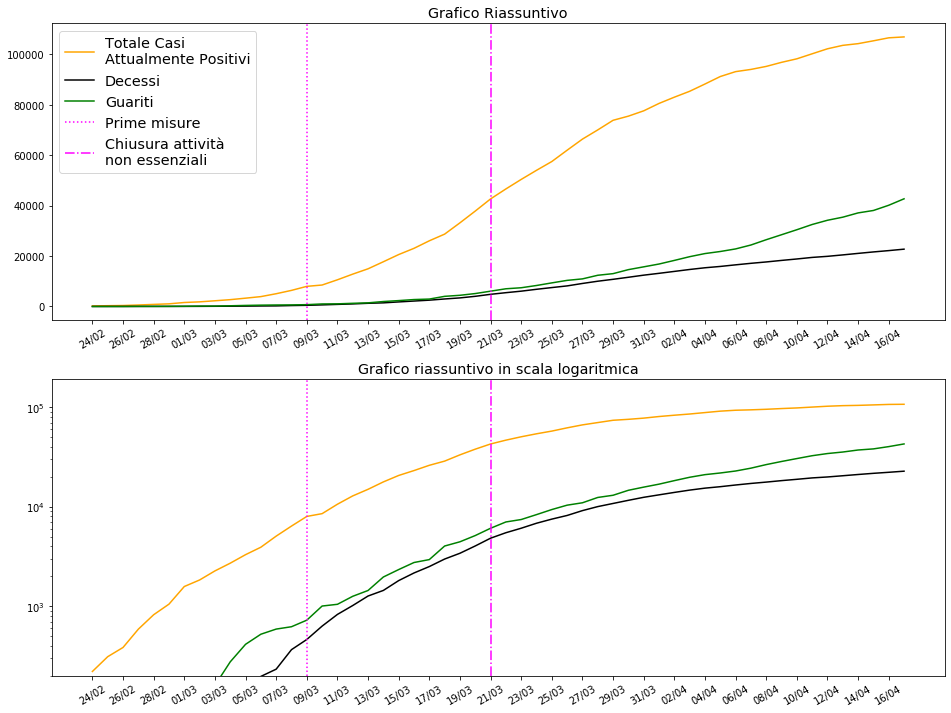

In [46]:
plt.figure(figsize=(16, 12))
plt.subplot(211)
plt.title('Grafico Riassuntivo',fontsize = 'x-large')
plt.plot(content_dict['data'],content_dict['totale_positivi'], label = 'Totale Casi\nAttualmente Positivi', color = 'orange')
plt.plot(content_dict['data'],content_dict['deceduti'], label = 'Decessi', color = 'black')
plt.plot(content_dict['data'],content_dict['dimessi_guariti'], label = 'Guariti', color = 'green')
plt.xticks(content_dict['data'][::2],content_dict['data'][::2], rotation = 30)
plt.axvline(x = '09/03', label = 'Prime misure',color = 'magenta', linestyle = ':')
plt.axvline(x = '21/03', label = 'Chiusura attività\nnon essenziali',color = 'magenta', linestyle = '-.')
plt.legend(fontsize = 'x-large')
plt.subplot(212)
plt.title('Grafico riassuntivo in scala logaritmica',fontsize = 'x-large')
plt.semilogy(content_dict['data'],content_dict['totale_positivi'], label = 'Totale Casi Attualmente Positivi', color = 'orange')
plt.semilogy(content_dict['data'],content_dict['deceduti'], label = 'Decessi', color = 'black')
plt.semilogy(content_dict['data'],content_dict['dimessi_guariti'], label = 'Guariti', color = 'green')
plt.xticks(content_dict['data'][::2],content_dict['data'][::2], rotation = 30)
plt.axvline(x = '09/03', label = 'Prime misure',color = 'magenta', linestyle = ':')
plt.axvline(x = '21/03', label = 'Chiusura attività\nnon essenziali',color = 'magenta', linestyle = '-.')
plt.ylim(bottom = 200)
plt.show()

Adesso solamente i deceduti

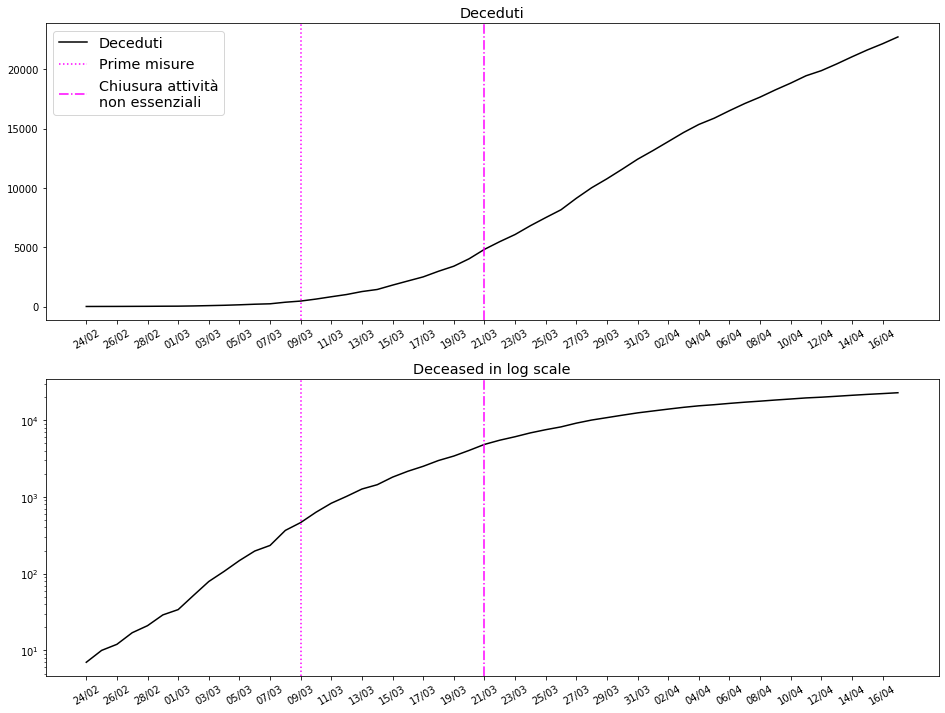

In [47]:
plt.figure(figsize=(16, 12))
plt.subplot(211)
plt.title('Deceduti',fontsize = 'x-large')
plt.plot(content_dict['data'],content_dict['deceduti'], label = 'Deceduti', color = 'black')
plt.xticks(content_dict['data'][::2],content_dict['data'][::2], rotation = 30)
plt.axvline(x = '09/03', label = 'Prime misure',color = 'magenta', linestyle = ':')
plt.axvline(x = '21/03', label = 'Chiusura attività\nnon essenziali',color = 'magenta', linestyle = '-.')
plt.legend(fontsize = 'x-large')
plt.subplot(212)
plt.title('Deceased in log scale',fontsize = 'x-large')
plt.semilogy(content_dict['data'],content_dict['deceduti'], label = 'Deceased', color = 'black')
plt.xticks(content_dict['data'][::2],content_dict['data'][::2], rotation = 30)
plt.axvline(x = '09/03', label = 'Prime misure',color = 'magenta', linestyle = ':')
plt.axvline(x = '21/03', label = 'Chiusura attività\nnon essenziali',color = 'magenta', linestyle = '-.')
plt.show()

## Grafici Giornalieri  

Adesso propongo i grafici di alcune variabili di interesse, che rappresentano l'evoluzione giornaliera della situazione. A queste variabili ho applicato un rolling average filter a 7 giorni, ma troncando gli ultimi tre punti. L'ispirazione per questo approccio viene da [questo](https://www.ft.com/coronavirus-latest) articolo del Finacial Times. Nel modulo `frcovid19` questa operazione &egrave; compiuta dalla funzione `moving_average`.  
Il rolling average sostituisce al dato di ogni giorno la media dei valori in un intervallo di sette giorni attorno ad esso (3 giorni prima e 3 giorni dopo).  
Questo pu&ograve; creare effetti ai bordi che sono stati valutati in [Appendice](#appendice).  
Passando ai grafici, valutiamo per primi I deceduti giornalieri.

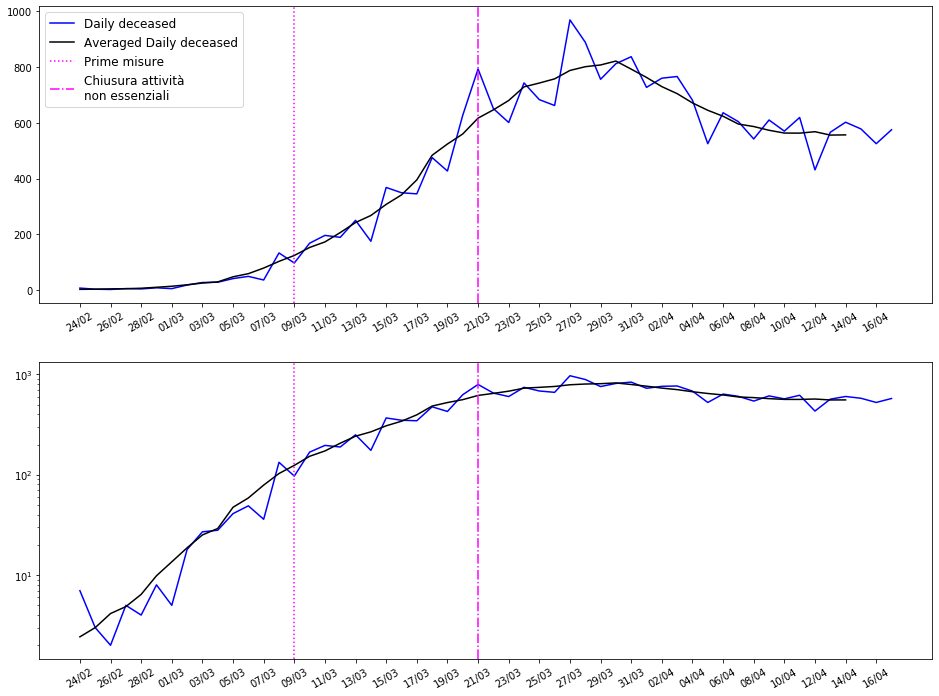

In [48]:
deceduti_giornalieri = [content_dict['deceduti'][0]]

for i in range(1,len(content_dict['data'])):
    deceduti_giornalieri.append(content_dict['deceduti'][i]-content_dict['deceduti'][i-1])
deceased_average_same = fr.moving_average(deceduti_giornalieri,7,mode = 'same')

plt.figure(figsize = (16,12))
plt.subplot(211)
plt.plot(content_dict['data'],deceduti_giornalieri,color = 'blue',label = 'Daily deceased')
plt.plot(content_dict['data'][0:-3],deceased_average_same[0:-3],color = 'black',label = 'Averaged Daily deceased')
plt.axvline(x = '09/03', label = 'Prime misure',color = 'magenta', linestyle = ':')
plt.axvline(x = '21/03', label = 'Chiusura attività\nnon essenziali',color = 'magenta', linestyle = '-.')
plt.xticks(content_dict['data'][::2],content_dict['data'][::2], rotation = 30)
plt.legend(loc = 'upper left',fontsize = 'large')
plt.subplot(212)
plt.semilogy(content_dict['data'],deceduti_giornalieri,color = 'blue')
plt.semilogy(content_dict['data'][0:-3],deceased_average_same[0:-3],color = 'black')
plt.axvline(x = '09/03', label = 'Prime misure',color = 'magenta', linestyle = ':')
plt.axvline(x = '21/03', label = 'Chiusura attività\nnon essenziali',color = 'magenta', linestyle = '-.')
plt.xticks(content_dict['data'][::2],content_dict['data'][::2], rotation = 30)
plt.show()

Adesso mettiamo in grafico la "variazione totale positivi", che &egrave; definita [qui](https://github.com/pcm-dpc/COVID-19) come totale positivi del giorno corrente meno il totale positivi del giorno precedente.

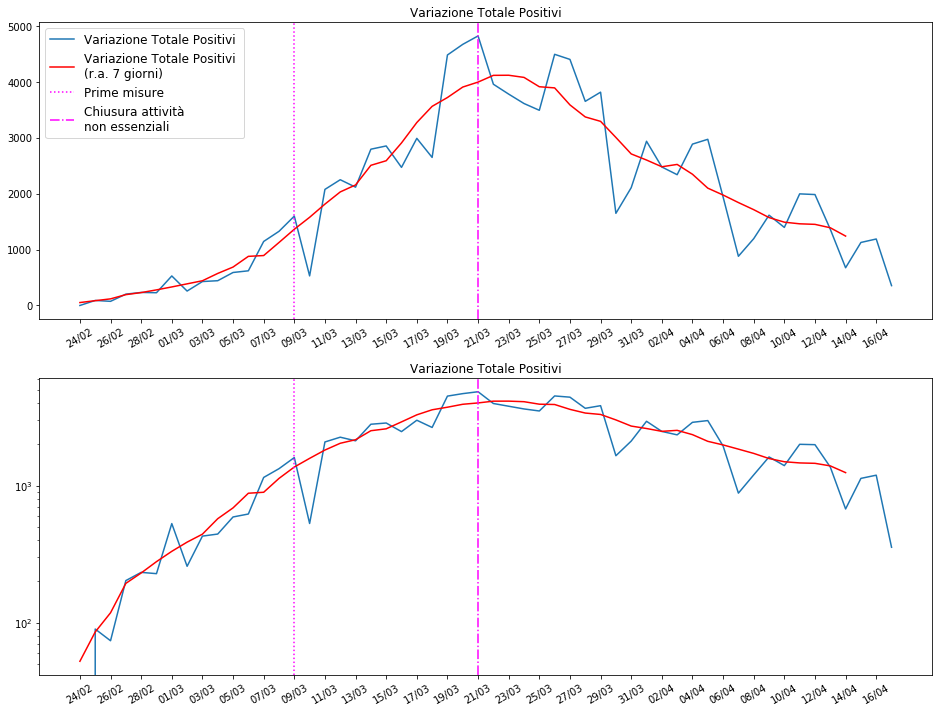

In [49]:
averaged_total_variation_active = fr.moving_average(content_dict['variazione_totale_positivi'],7,mode='same')

plt.figure(figsize=(16, 12))
plt.subplot(211)
plt.title('Variazione Totale Positivi')
plt.plot(content_dict['data'],content_dict['variazione_totale_positivi'],label = 'Variazione Totale Positivi')
plt.plot(content_dict['data'][0:-3],averaged_total_variation_active[0:-3],label = 'Variazione Totale Positivi \n(r.a. 7 giorni)',color = 'red')
plt.axvline(x = '09/03', label = 'Prime misure',color = 'magenta', linestyle = ':')
plt.axvline(x = '21/03', label = 'Chiusura attività\nnon essenziali',color = 'magenta', linestyle = '-.')
plt.legend(fontsize = 'large', loc = 'upper left')
plt.xticks(content_dict['data'][::2],content_dict['data'][::2], rotation = 30)
plt.subplot(212)
plt.title('Variazione Totale Positivi')
plt.semilogy(content_dict['data'],content_dict['variazione_totale_positivi'],label = 'Variazione Totale Positivi')
plt.semilogy(content_dict['data'][0:-3],averaged_total_variation_active[0:-3],label = 'Total variation of active cases \n(r.a. 7 days)',color = 'red')
plt.axvline(x = '09/03', label = 'Prime misure',color = 'magenta', linestyle = ':')
plt.axvline(x = '21/03', label = 'Chiusura attività\nnon essenziali',color = 'magenta', linestyle = '-.')
plt.xticks(content_dict['data'][::2],content_dict['data'][::2], rotation = 30)
plt.show()

A causa della scarsa chiarezza della legenda riportata dalla Protezione Civile, faccio un grafico anche della grandezza "nuovi_positivi".  


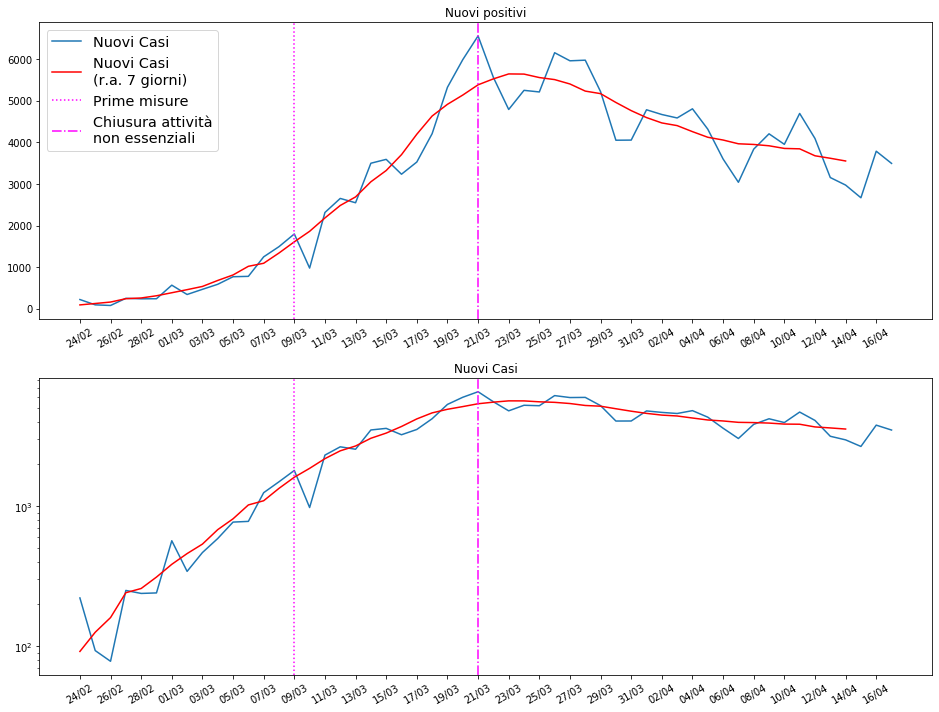

In [50]:
averaged_new_cases = fr.moving_average(content_dict['nuovi_positivi'],7,mode = 'same')

plt.figure(figsize=(16, 12))
plt.subplot(211)
plt.title('Nuovi positivi')
plt.plot(content_dict['data'],content_dict['nuovi_positivi'],label = 'Nuovi Casi')
plt.plot(content_dict['data'][0:-3],averaged_new_cases[0:-3],label = 'Nuovi Casi \n(r.a. 7 giorni)',color = 'red')
plt.axvline(x = '09/03', label = 'Prime misure',color = 'magenta', linestyle = ':')
plt.axvline(x = '21/03', label = 'Chiusura attività\nnon essenziali',color = 'magenta', linestyle = '-.')
plt.legend(fontsize = 'x-large', loc = 'upper left')
plt.xticks(content_dict['data'][::2],content_dict['data'][::2], rotation = 30)
plt.subplot(212)
plt.title('Nuovi Casi')
plt.semilogy(content_dict['data'],content_dict['nuovi_positivi'],label = 'Total variation of active cases')
plt.semilogy(content_dict['data'][0:-3],averaged_new_cases[0:-3],label = 'New cases \n(r.a. 7 days)',color = 'red')
plt.axvline(x = '09/03', label = 'Prime misure',color = 'magenta', linestyle = ':')
plt.axvline(x = '21/03', label = 'Chiusura attività\nnon essenziali',color = 'magenta', linestyle = '-.')
plt.xticks(content_dict['data'][::2],content_dict['data'][::2], rotation = 30)
plt.show()

Le ragioni dell'incertezza viene da queste celle:  

| Nome campo                  | Descrizione                       | Description                            | Formato                       | Esempio             |
|-----------------------------|-----------------------------------|----------------------------------------|-------------------------------|---------------------|
| **totale_positivi** | Totale attualmente positivi (ospedalizzati + isolamento domiciliare)      | Total amount of current positive cases (Hospitalised patients + Home confinement)  | Numero                        | 3                   |
| **variazione_totale_positivi**  | Variazione del totale positivi (totale_positivi giorno corrente - totale_positivi giorno precedente)       | News amount of current positive cases (totale_positivi current day - totale_positivi previous day)  | Numero                        | 3                   |
| **nuovi_positivi**  | Nuovi attualmente positivi (totale_casi giorno corrente - totale_casi giorno precedente)       | News amount of current positive cases (totale_casi current day - totale_casi previous day)  
| **totale_casi**                 | Totale casi positivi              | Total amount of positive cases         | Numero                        | 3                   |  

Quindi il "totale_casi" contiene anche i casi che non sono pi&ugrave; positivi, o meglio, che lo sono stati a un certo punto? Vista questa incertezza, riporto anche questo dato, per non omettere informazioni. Allo stesso tempo, per&ograve;, viene specificato che il "totale positivi" contiene "ospedalizzati e isolamento domiciliare". Questo vuol dire che nel "totale_casi" sono inclusi altri casi, che sono appena stati identificati come positivi?

## Tamponi Analizzati

La Protezione Civile riporta soltanto il dato totale:



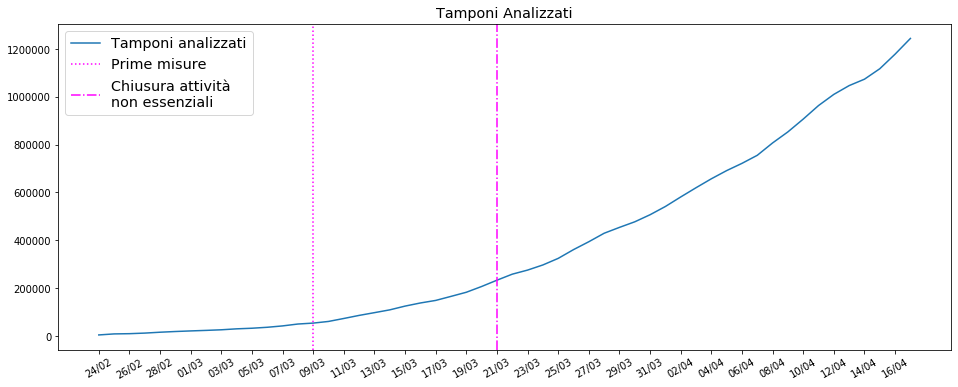

In [51]:
plt.figure(figsize=(16, 6))
plt.title('Tamponi Analizzati',fontsize = 'x-large')
plt.plot(content_dict['data'],content_dict['tamponi'], label = 'Tamponi analizzati')
plt.axvline(x = '09/03', label = 'Prime misure',color = 'magenta', linestyle = ':')
plt.axvline(x = '21/03', label = 'Chiusura attività\nnon essenziali',color = 'magenta', linestyle = '-.')
plt.legend(fontsize = 'x-large')
plt.xticks(content_dict['data'][::2],content_dict['data'][::2], rotation = 30)
plt.show()

In realt&agrave; sarebbe pi&ugrave; utile riportare i tamponi analizzati giorno per giorno

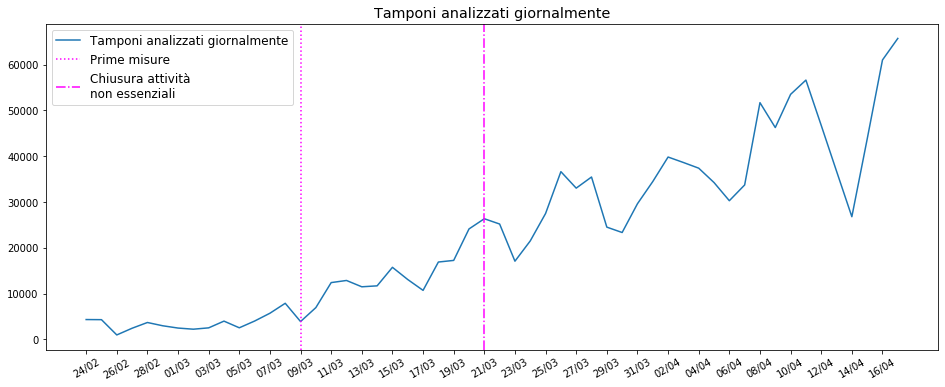

In [52]:
tamponi_gionalieri = [content_dict['tamponi'][0]];
for i in range(1,len(content_dict['tamponi'])):
    tamponi_gionalieri.append(content_dict['tamponi'][i]-content_dict['tamponi'][i-1])

plt.figure(figsize=(16, 6))
plt.title('Tamponi analizzati giornalmente', fontsize = 'x-large')
plt.plot(content_dict['data'],tamponi_gionalieri, label = 'Tamponi analizzati giornalmente')
plt.axvline(x = '09/03', label = 'Prime misure',color = 'magenta', linestyle = ':')
plt.axvline(x = '21/03', label = 'Chiusura attività\nnon essenziali',color = 'magenta', linestyle = '-.')
plt.legend(fontsize = 'large')
plt.xticks(content_dict['data'][::2],content_dict['data'][::2], rotation = 30)
plt.show()

Esiste un "effetto Luned&igrave;"?  
Ovvero, &egrave; possibile che i laboratori di analisi riportino meno dati di Luned&igrave;, perch&egrave; (giustamente) lavorano ad efficienza minore durante il finesettimana? Rapidamente, evidenziamo i Luned&igrave; nel grafico di cui sopra:

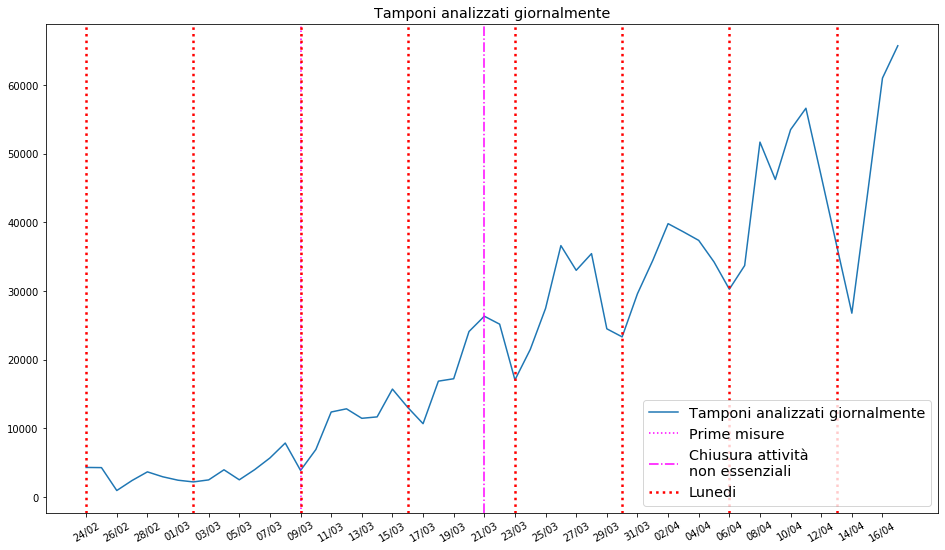

In [53]:
mondays = content_dict['data'][0::7]

plt.figure(figsize=(16, 9))
plt.title('Daily analyzed tests', fontsize = 'x-large')
plt.title('Tamponi analizzati giornalmente', fontsize = 'x-large')
plt.plot(content_dict['data'],tamponi_gionalieri, label = 'Tamponi analizzati giornalmente')
plt.axvline(x = '09/03', label = 'Prime misure',color = 'magenta', linestyle = ':')
plt.axvline(x = '21/03', label = 'Chiusura attività\nnon essenziali',color = 'magenta', linestyle = '-.')
for i in range(0,len(mondays)):
    if i == 0:
        plt.axvline(x = mondays[i],color = 'red',label = 'Lunedi',linestyle = ':',linewidth = 2.5)
    else:
        plt.axvline(x = mondays[i],color = 'red',linestyle = ':',linewidth = 2.5)
plt.legend(fontsize = 'x-large')
plt.xticks(content_dict['data'][::2],content_dict['data'][::2], rotation = 30)
plt.show()

L'introduzione del "rolling average" &egrave; dunque legittima, visto che &egrave; in grado di ridurre l'effetto di queste variazioni nel numero di tamponi analizzati.  
Allo stesso tempo, fornisce una valida motivazione all'uso di strumenti come la correlazione tra grandezze diverse.

## Misure Correlative

Una premessa: nessuna misura &egrave; esatta, tutti i modelli sono sbagliati.  
[Lamentarsi](https://www.francescocosta.net/2020/03/19/dati-ufficiali-illusione-ottica/) della precisione delle misure, e di cosa dicono i dati, non &egrave; corretto. Abbiamo dei dati, li possiamo usare, per quanto non siano corretti. Sono perfettamente conscio che l'intenzione di Costa in particolare fosse quella di metterci in guardia da previsioni azzardate e/o aspettative irrealistiche, ma non si tratta di un atteggiamento costruttivo.  

Soprattutto perch&egrave; studiare i dati ci da una luce nel buio, per quanto flebile. E se ci concentriamo solo sulle ombre lunghe che questa luce proietta, non possiamo godere dei suoi benefici. Quindi, come fare? Io ci ho provato come segue.



### Tamponi analizzati giornalmente vs. nuovi positivi  

Queste due quantita _devono_ essere necessariamente correlate. Tuttavia, in nessun mondo se non in quello ideale, avremmo la possibilit&agrave; di effettuare l'unica misura che ci dia la certezza matematica di misurare i nuovi positivi "reali". Possiamo, per&ograve;, fare il seguente assunto: i positivi rilevati sono direttamente collegati ai positivi effettivi. Quindi, un campionamento ha pi&ugrave; probabilit&agrave; di prendere nuovi positivi proprio se ci sono molti nuovi positivi.  
Di conseguenza, un risultato desiderabile sarebbe avere molti tamponi, ma pochi casi rilevati. Ovvero, nel grafico che segue, vorremmo trovarci pi&ugrave; vicino possibile all'angolo in basso a destra. Avere pochi casi, ma anche pochi campioni, non porta nessun beneficio (vedi le prime settimane, in cui succedeva esattamente questo.)

In [54]:
#Preliminary operations: we divide the data into weeks for ease of visualization. 

content_dict['settimana'] = [];
content_dict['settimana'].append('Settimana 1')
for i in range(1,len(content_dict['data'])):
    content_dict['settimana'].append('Settimana ' + str(m.ceil((i+1)/7)))

#find which weeks are complete
weekly_positives = list(zip(content_dict['settimana'],content_dict['nuovi_positivi']))
complete_weeks = m.ceil(len(content_dict['data'])/7)

#define the colormap
from matplotlib import cm

thecolormap = cm.get_cmap('gnuplot2_r',4*complete_weeks+3)
week_no = []
for element in content_dict['settimana']:
    week_no.append(int(element[-1]))

#some variable initialization
positives_this_week2 = np.zeros(7)
tests_this_week2 = np.zeros(7)
positives_this_week = [];
tests_this_week = [];
crosscoeff = [];

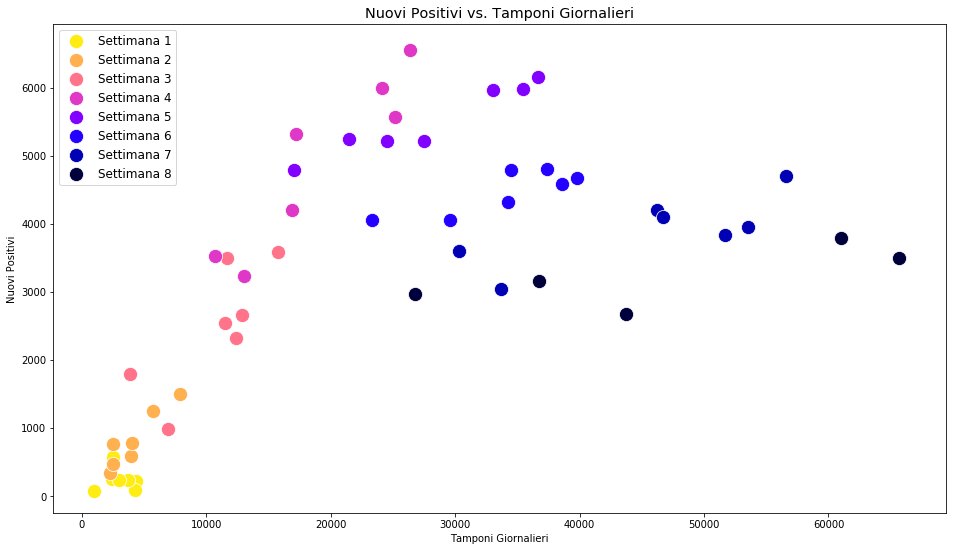

In [55]:
#let's divide the data in weeks to make it easier to visualize

plt.figure(figsize=(16,9))
plt.title('Nuovi Positivi vs. Tamponi Giornalieri',fontsize = 'x-large')
for week in range(1,complete_weeks+1):
    positives_this_week = [];
    tests_this_week = [];
    positives_this_week2 = np.zeros(7)
    tests_this_week2 = np.zeros(7)
    for day in range(0,len(content_dict['data'])):
        if weekly_positives[day][0] == 'Settimana '+str(week):
            positives_this_week.append(weekly_positives[day][1])
            tests_this_week.append(tamponi_gionalieri[day])
    positives_this_week2 = np.array(positives_this_week)
    tests_this_week2 = np.array(tests_this_week)
    this_week_points = sns.scatterplot(tests_this_week2,positives_this_week2,color = thecolormap(week*4),s=200,label = ('Settimana ' + str(week)))
plt.xlabel('Tamponi Giornalieri')
plt.ylabel('Nuovi Positivi')
plt.legend(loc = 'upper left',fontsize = 'large')
plt.show()

Siamo ancora piuttosto lontani.  
Una quantit&agrave; che possiamo utilizzare per capire l'andamento della situazione, &egrave; calcolare il Pearson Correlation Coefficient, che ci da un'idea di come variano i Nuovi positivi in base ai tamponi analizzati.

In [56]:
for week in range(0,complete_weeks+2):
    positives_this_week = [];
    tests_this_week = [];
    for day in range(0,len(content_dict['data'])):
        if weekly_positives[day][0] == 'Settimana '+str(week):
            positives_this_week.append(weekly_positives[day][1])
            tests_this_week.append(tamponi_gionalieri[day])
    coeff_matrix = (np.corrcoef(positives_this_week,tests_this_week))
    crosscoeff.append(coeff_matrix[1][0]) 

print('Pearson Correlation Coefficient (Tamponi Analizzati vs. Nuovi Positivi)')
print('-----------------------------------------------------------------------')
print('Settimana #\t\t r Coefficient')
print('--------------------------------------')
for week in range(1,complete_weeks+1):
    print(f'Settimana {week}\t\t {crosscoeff[week-1]:.4f}')

Pearson Correlation Coefficient (Tamponi Analizzati vs. Nuovi Positivi)
-----------------------------------------------------------------------
Settimana #		 r Coefficient
--------------------------------------
Settimana 1		 nan
Settimana 2		 -0.0584
Settimana 3		 0.9308
Settimana 4		 0.7775
Settimana 5		 0.9284
Settimana 6		 0.9607
Settimana 7		 0.8186
Settimana 8		 0.7772


Questa quantit&agrave; &egrave; utile per dare una visualizzazione pi&ugrave; leggibile:

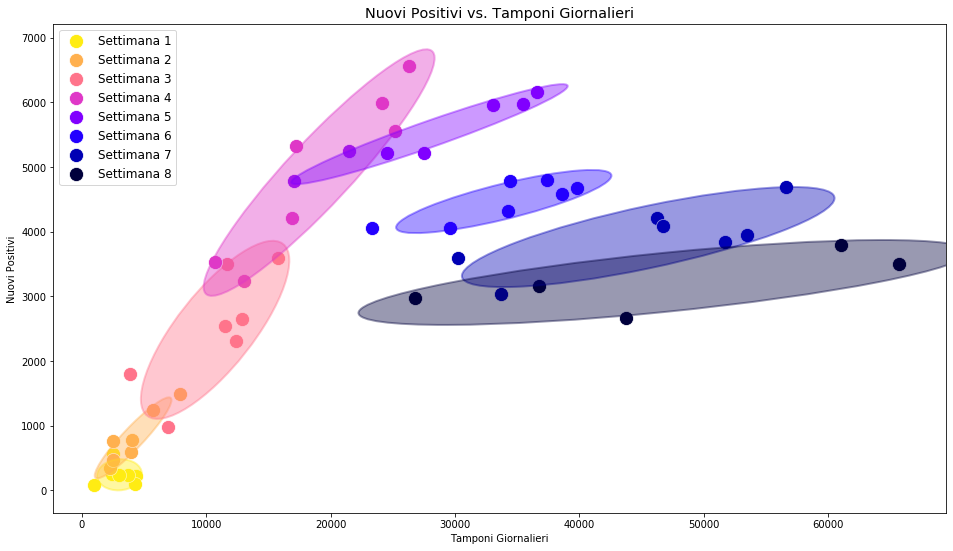

In [57]:
plt.figure(figsize=(16,9))
plt.title('Nuovi Positivi vs. Tamponi Giornalieri',fontsize = 'x-large')
for week in range(1,complete_weeks+1):
    positives_this_week = [];
    tests_this_week = [];
    positives_this_week2 = np.zeros(7)
    tests_this_week2 = np.zeros(7)
    for day in range(0,len(content_dict['data'])):
        if weekly_positives[day][0] == 'Settimana '+str(week):
            positives_this_week.append(weekly_positives[day][1])
            tests_this_week.append(tamponi_gionalieri[day])
    positives_this_week2 = np.array(positives_this_week)
    tests_this_week2 = np.array(tests_this_week)
    this_week_points = sns.scatterplot(tests_this_week2,positives_this_week2,color = thecolormap(week*4),s=200,label = ('Settimana ' + str(week)))
    if len(tests_this_week)>3:
        fr.confidence_ellipse(tests_this_week2,positives_this_week2,this_week_points,3,fill = True,lw = 2,ec = thecolormap(week*4),fc = thecolormap(week*4),alpha=0.4)
plt.xlabel('Tamponi Giornalieri')
plt.ylabel('Nuovi Positivi')
plt.legend(loc = 'upper left',fontsize = 'large')
#plt.text(20000,0,'Le settimane incomplete non sono raggruppate',fontsize = 'large')
plt.show()

## \[Rimosso\] Trendlines  

Inizialmente, pensavo che questa fosse una buona idea, di cercare di fare una regressione dei dati settimana per settimana, per trovare il trend. Tuttavia, questo si basava sull'assunto che il numero di Tamponi giornalieri aumentasse nel tempo, cosa che non &egrave; necessariamente vero. Tuttavia, lo riporto lo stesso: &egrave; sempre bene imparare dai propri errori.

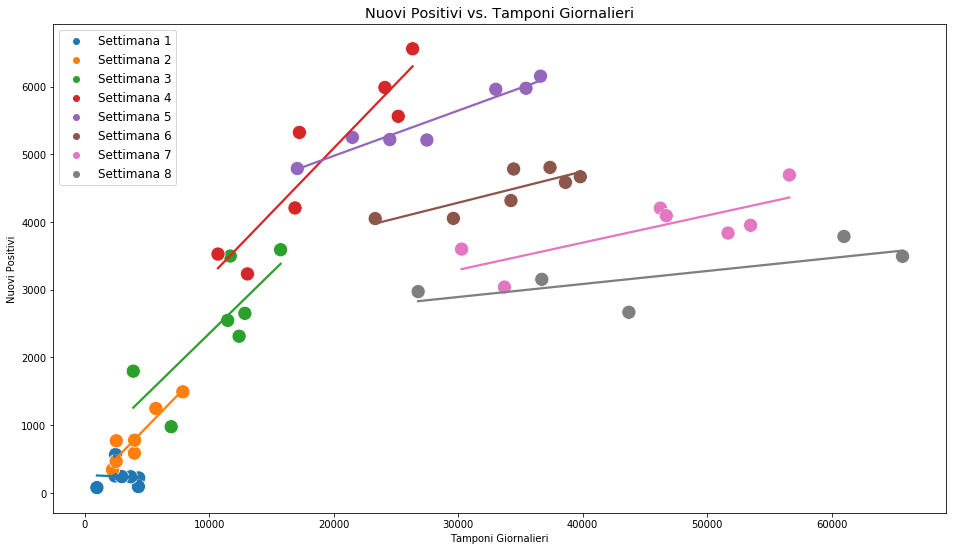

In [58]:
slopes = [];

plt.figure(figsize=(16,9))
plt.title('Nuovi Positivi vs. Tamponi Giornalieri',fontsize = 'x-large')
sns.scatterplot(x = tamponi_gionalieri, y = content_dict['nuovi_positivi'],hue= content_dict['settimana'],s=200,legend = 'full')
for week in range(1,complete_weeks+1):
    positives_this_week = [];
    tests_this_week = [];
    for day in range(0,len(content_dict['data'])):
        if weekly_positives[day][0] == 'Settimana '+str(week):
            positives_this_week.append(weekly_positives[day][1])
            tests_this_week.append(tamponi_gionalieri[day])
    ax = sns.regplot(x=tests_this_week,y = positives_this_week,truncate = True, ci = None)
    slope_this_week,_ = np.polyfit(tests_this_week,positives_this_week, deg = 1)
    slopes.append(slope_this_week)
plt.xlabel('Tamponi Giornalieri')
plt.ylabel('Nuovi Positivi')
plt.legend(loc = 'upper left',fontsize = 'large')
plt.show()

In [59]:
print('Slopes of Daily tests vs. new cases detected for each week')
print('----------------------------------------------------------') 
for week in range(0,complete_weeks):
    print(f'Week {week+1}\t\t {slopes[week]:.3f}')

Slopes of Daily tests vs. new cases detected for each week
----------------------------------------------------------
Week 1		 -0.008
Week 2		 0.189
Week 3		 0.179
Week 4		 0.191
Week 5		 0.067
Week 6		 0.046
Week 7		 0.040
Week 8		 0.019


## <a name="appendice">Appendice</a>  
### Valutazione dei "rolling averages"
## Visualization with Moving averages

[Questo](https://www.ft.com/coronavirus-latest) articolo del Financial Times usa il "rolling average" in maniera estesa per dare la curva dei deceduti per Coronavirus. Ma &egrave; giusto usare questo filtro su tutta la lunghezza dei dati? Proviamo.  

Usando il metodo della convoluzione per ottenere il moving average, possiamo usare tre metodi:
* **valid**: che lo effettua solo nei punti in cui il filtro e i dati si sovrappongono;
* **same**: che riporta un vettore lungo quanto i dati iniziali, e dunque soggetto a effetti ai bordi;
* **full**: che riporta un vettore lungo quanto i dati iniziali pi&ugrave; il filtro, quindi con significativi effetti ai bordi.  

Come si comportano, dunque?


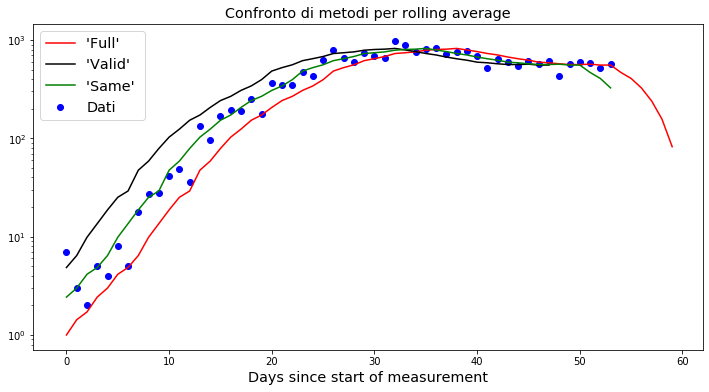

In [60]:
deceased_average_full = fr.moving_average(deceduti_giornalieri,7,mode = 'full')
deceased_average_same = fr.moving_average(deceduti_giornalieri,7,mode = 'same')
deceased_average_valid = fr.moving_average(deceduti_giornalieri,7,mode = 'valid')


plt.figure(figsize = (12,6))
plt.title('Confronto di metodi per rolling average',fontsize = 'x-large')
plt.semilogy(np.arange(0,len(deceased_average_full)),deceased_average_full, color = 'red')
plt.semilogy(np.arange(0,len(deceased_average_valid)),deceased_average_valid, color = 'black')
plt.semilogy(np.arange(0,len(deceased_average_same)),deceased_average_same, color = 'green')
plt.scatter(np.arange(0,len(content_dict['data'])), deceduti_giornalieri, color = 'blue')
plt.legend(["'Full' ","'Valid' ","'Same' ",'Dati'],fontsize = 'x-large')
plt.xlabel('Days since start of measurement',fontsize = 'x-large')
plt.show()

Come possiamo Notare, mentre il metodo "Full" in realt&egrave; riporta bene la parte finale della curva, allo stesso tempo sottistima la parte iniziale significativamente. Scegliamo dunque di utilizzare il metodo "same" in quanto pi&ugrave; fedele ai dati iniziali. Tuttavia, visti gli effetti ai bordi, taglier&ograve; gli ultimi tre punti per maggiore esattezza. Nel prossimo grafico, vediamo gli effetti che una maggiore o minore lunghezza del filtro ha sui dati.

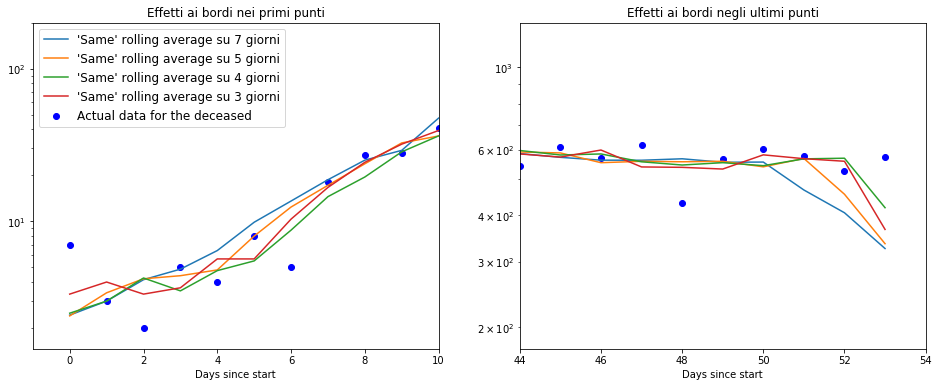

In [61]:
deceased_sameaverage = np.zeros(shape = (8,len(content_dict['deceduti'])));
which_kernels = [7,5,4,3]

for i in which_kernels:
    deceased_sameaverage[i,:] = fr.moving_average(deceduti_giornalieri,i,mode = 'same')

plt.figure(figsize = (16,6))
plt.subplot(121)
plt.title('Effetti ai bordi nei primi punti')
ax = plt.gca()
ax.scatter(np.arange(0,len(content_dict['data'])), deceduti_giornalieri, color = 'blue',label = 'Actual data for the deceased')
for i in which_kernels:
    plt.semilogy(np.arange(0,len(content_dict['data'])),deceased_sameaverage[i,:],label = ("'Same' rolling average su " + str(i) + " giorni"))
ax.set_yscale('log')
plt.xlim((-1,10))
plt.ylim((-1,200))
plt.xlabel('Days since start')
plt.legend(loc = 'best',fontsize = 'large')
plt.subplot(122)
plt.title('Effetti ai bordi negli ultimi punti')
ax = plt.gca()
ax.scatter(np.arange(0,len(content_dict['data'])), deceduti_giornalieri, color = 'blue')
for i in which_kernels:
    plt.semilogy(np.arange(0,len(content_dict['data'])),deceased_sameaverage[i,:])
plt.xlim(len(content_dict['data'])-10,len(content_dict['data']))
plt.ylim(bottom = deceduti_giornalieri[-35])
plt.xlabel('Days since start')

plt.show()

<a href="javascript:history.back()">Torna all'articolo.</a>  
<a href="#top">Torna all'inizio</a>